In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
plt.rcParams["figure.figsize"] = (10,4)
# plt.rcParams.update({'font.size': 28})
matpltlib_default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


# SFC, BFS, parMETIS, ptscotch respectively
plot_colors = [matpltlib_default_colors[3], matpltlib_default_colors[2], matpltlib_default_colors[0], matpltlib_default_colors[5]] 

In [4]:
input_file_name = 'test.json'
df = pd.read_json(input_file_name, orient='records',lines=True)
# df = df[(df['np'] == 1280) | (df['np']==640)] 
df = df[(df['np'] == 10)] 
# df = df[df['mesh_idx'] == 0] 
df = df[df['run_idx'] == 0] 


df.reset_index(drop=True, inplace=True)
# df = pd.read_csv(input_file_name+'.csv')  
partition_count = df['np'][0]
df_length = len(df.index)
# print(df.loc[6]['mesh_file'])
# print(df.loc[0])

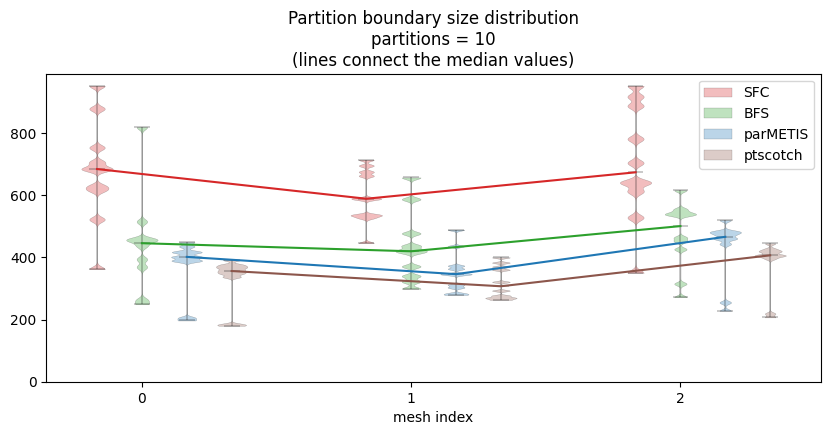

In [5]:
fig0, ax0 = plt.subplots()
plt_triplets = [None for _ in range(df_length)]
for plt_i in range(df_length):
  plt_triplets[plt_i] = ax0.violinplot([df.loc[plt_i]['SFC_morton_partition_boundaries'],df.loc[plt_i]['BFS_partition_boundaries'],df.loc[plt_i]['parMETIS_partition_boundaries'],df.loc[plt_i]['ptscotch_partition_boundaries']], positions=[6*plt_i,6*plt_i+1,6*plt_i+2,6*plt_i+3], showmedians=True, widths=0.7, points=1000, showextrema=True, bw_method=0.05)
  # plt_triplets[plt_i] = ax0.boxplot([df.loc[plt_i]['SFC_morton_partition_boundaries'],df.loc[plt_i]['BFS_partition_boundaries'],df.loc[plt_i]['BFS_grow_partition_boundaries'],df.loc[plt_i]['METIS_partition_boundaries']], positions=[6*plt_i,6*plt_i+1,6*plt_i+2,6*plt_i+3], widths=0.7, showfliers=True)


ax0.plot([6*i for i in range(df_length)],[np.median(df.loc[i]['SFC_morton_partition_boundaries']) for i in range(df_length)],color=plot_colors[0])
ax0.plot([6*i+1 for i in range(df_length)],[np.median(df.loc[i]['BFS_partition_boundaries']) for i in range(df_length)],color=plot_colors[1])
ax0.plot([6*i+2 for i in range(df_length)],[np.median(df.loc[i]['parMETIS_partition_boundaries']) for i in range(df_length)],color=plot_colors[2])

ax0.plot([6*i+3 for i in range(df_length)],[np.median(df.loc[i]['ptscotch_partition_boundaries']) for i in range(df_length)],color=plot_colors[3])



for plt_triplet in plt_triplets:

  for i in range(4):
     plt_triplet['bodies'][i].set_facecolor(plot_colors[i])
     plt_triplet['bodies'][i].set_edgecolor('black')
     plt_triplet['bodies'][i].set_linewidth(0.3)

  for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
      vp = plt_triplet[partname]
      vp.set_edgecolor("black")
      vp.set_linewidth(0.3)


  # plot_pair['bodies'][1].set_edgecolor('red')
ax0.legend([plt_triplets[0]["bodies"][0], plt_triplets[0]["bodies"][1],plt_triplets[0]["bodies"][2],plt_triplets[0]["bodies"][3]], ['SFC', 'BFS','parMETIS', 'ptscotch'],bbox_to_anchor=(1.0, 1.0))

ax0.set_xticks([(6*i + 6*i+2)/2 for i in range(df_length)])

# ax0.set_xticklabels(['Data 1-2', 'Data 3-4'])
ax0.set_xticklabels([str(i) for i in range(df_length)])
ax0.set_ylim(bottom=0)
ax0.set_title(f'Partition boundary size distribution\npartitions = {partition_count}\n(lines connect the median values)')
ax0.set_xlabel('mesh index')
plt.show()
# fig0.savefig(input_file_name+'partition-cuts.svg', format='svg', dpi=1200)

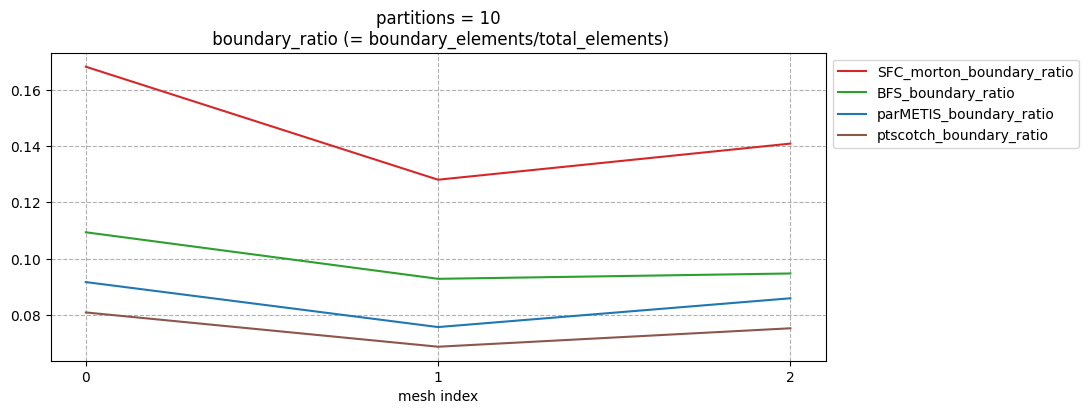

In [6]:

ax1 = df.plot.line(y = ['SFC_morton_boundary_ratio','BFS_boundary_ratio','parMETIS_boundary_ratio','ptscotch_boundary_ratio'], rot=0,color=plot_colors)
ax1.set_title(f"partitions = {partition_count}\n boundary_ratio (= boundary_elements/total_elements)")
ax1.legend(bbox_to_anchor=(1.0, 1.0))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.grid(which='major', axis='both', linestyle='--')
ax1.set_xlabel('mesh index')

fig1 = ax1.get_figure()
# fig1.savefig(input_file_name+'boundary_ratio.svg', format='svg', dpi=1200)


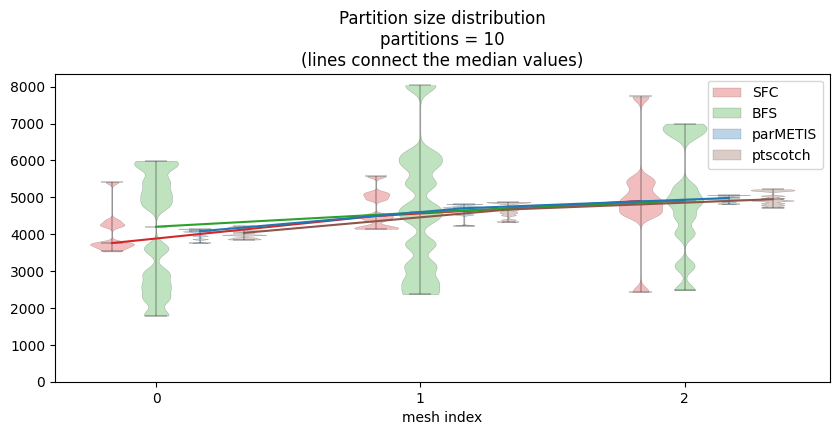

In [7]:
fig11, ax11 = plt.subplots()
plt_triplets = [None for _ in range(df_length)]
for plt_i in range(df_length):
  plt_triplets[plt_i] = ax11.violinplot([df.loc[plt_i]['SFC_morton_partition_sizes'],df.loc[plt_i]['BFS_partition_sizes'],df.loc[plt_i]['parMETIS_partition_sizes'],df.loc[plt_i]['ptscotch_partition_sizes']], positions=[6*plt_i,6*plt_i+1,6*plt_i+2,6*plt_i+3], showmedians=True, widths=1, points=1000, showextrema=True, bw_method=0.1)


ax11.plot([6*i for i in range(df_length)],[np.median(df.loc[i]['SFC_morton_partition_sizes']) for i in range(df_length)],color=plot_colors[0])
ax11.plot([6*i+1 for i in range(df_length)],[np.median(df.loc[i]['BFS_partition_sizes']) for i in range(df_length)],color=plot_colors[1])
ax11.plot([6*i+2 for i in range(df_length)],[np.median(df.loc[i]['parMETIS_partition_sizes']) for i in range(df_length)],color=plot_colors[2])

ax11.plot([6*i+3 for i in range(df_length)],[np.median(df.loc[i]['ptscotch_partition_sizes']) for i in range(df_length)],color=plot_colors[3])



for plt_triplet in plt_triplets:

  for i in range(4):
     plt_triplet['bodies'][i].set_facecolor(plot_colors[i])
     plt_triplet['bodies'][i].set_edgecolor('black')
     plt_triplet['bodies'][i].set_linewidth(0.3)

  for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
      vp = plt_triplet[partname]
      vp.set_edgecolor("black")
      vp.set_linewidth(0.3)


  # plot_pair['bodies'][1].set_edgecolor('red')
ax11.legend([plt_triplets[0]["bodies"][0], plt_triplets[0]["bodies"][1],plt_triplets[0]["bodies"][2],plt_triplets[0]["bodies"][3]], ['SFC', 'BFS','parMETIS', 'ptscotch'],bbox_to_anchor=(1.0, 1.0))

ax11.set_xticks([(6*i + 6*i+2)/2 for i in range(df_length)])

# ax11.set_xticklabels(['Data 1-2', 'Data 3-4'])
ax11.set_xticklabels([str(i) for i in range(df_length)])
ax11.set_ylim(bottom=0)

ax11.set_title(f'Partition size distribution\npartitions = {partition_count}\n(lines connect the median values)')
ax11.set_xlabel('mesh index')
plt.show()
# fig11.savefig(input_file_name+'partition-sizes.svg', format='svg', dpi=1200)

Text(0.5, 0, 'mesh index')

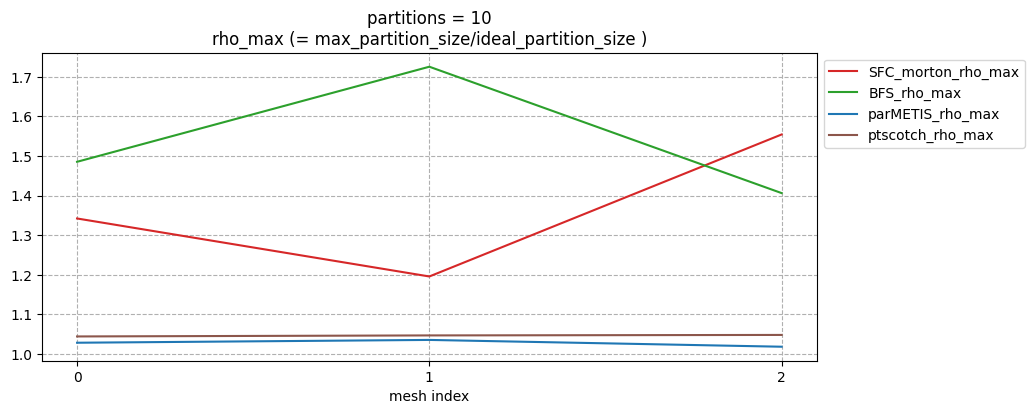

In [8]:
ax2 = df.plot.line(y = ['SFC_morton_rho_max','BFS_rho_max','parMETIS_rho_max','ptscotch_rho_max',], rot=0,color=plot_colors)
ax2.set_title(f"partitions = {partition_count}\nrho_max (= max_partition_size/ideal_partition_size )")
ax2.legend(bbox_to_anchor=(1.0, 1.0))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.grid(which='major', axis='both', linestyle='--')
ax2.set_xlabel('mesh index')


Text(0.5, 0, 'mesh index')

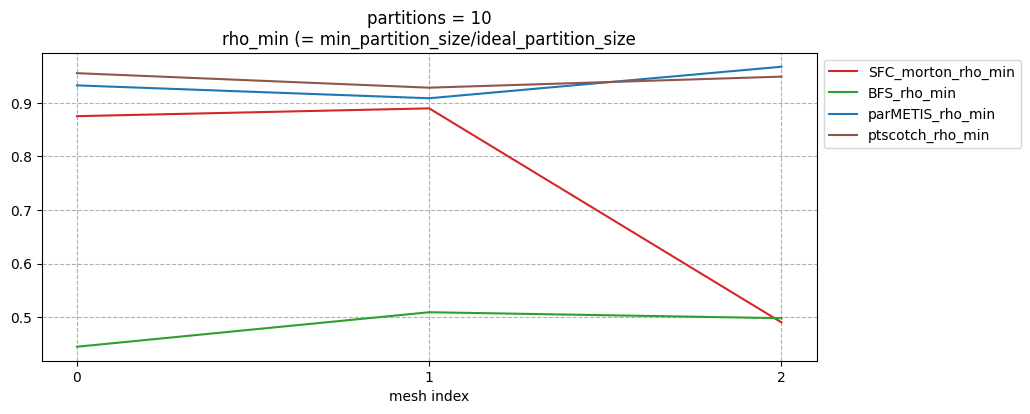

In [9]:
ax3 = df.plot.line(y = ['SFC_morton_rho_min','BFS_rho_min','parMETIS_rho_min','ptscotch_rho_min'], rot=0,color=plot_colors)
ax3.set_title(f"partitions = {partition_count}\nrho_min (= min_partition_size/ideal_partition_size")
ax3.legend(bbox_to_anchor=(1.0, 1.0))
ax3.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax3.grid(which='major', axis='both', linestyle='--')
ax3.set_xlabel('mesh index')
